In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm
from aging.plotting import figure, format_plots

In [18]:
format_plots()

In [4]:
files = sorted(Path('/n/groups/datta/win/longtogeny/dlight').glob('**/phot*.parquet'))

In [6]:
len(files)

154

In [62]:
stats = []
for f in tqdm(files):
    df = pd.read_parquet(f)

    d = (
        df[["pmt00_ref01_robust_dff (UV)", "pmt00_ref00_robust_dff (dLight)"]]
        .rolling(41, win_type="exponential")
        .mean(tau=5)
    )
    corr = d.corr(numeric_only=True).loc[
        "pmt00_ref01_robust_dff (UV)", "pmt00_ref00_robust_dff (dLight)"
    ]

    dlight = d["pmt00_ref00_robust_dff (dLight)"]
    uv = d["pmt00_ref00_robust_dff (dLight)"]
    sig_max = dlight.quantile(0.9)
    snr = sig_max / uv.std()
    stats.append(dict(file=str(f), isos_corr=corr, snr=snr, sig_max=sig_max))
stats = pd.DataFrame(stats)

  0%|          | 0/154 [00:00<?, ?it/s]

In [41]:
stats

,file,isos_corr,snr
0,/n/groups/datta/win/longtogeny/dlight/session_...,0.119661,2.316498
1,/n/groups/datta/win/longtogeny/dlight/session_...,0.068453,2.356881
2,/n/groups/datta/win/longtogeny/dlight/session_...,0.064857,2.407083
3,/n/groups/datta/win/longtogeny/dlight/session_...,0.116479,2.541813
4,/n/groups/datta/win/longtogeny/dlight/session_...,0.189457,2.427233
...,...,...,...
149,/n/groups/datta/win/longtogeny/dlight/session_...,0.117606,2.413958
150,/n/groups/datta/win/longtogeny/dlight/session_...,0.191248,2.345685
151,/n/groups/datta/win/longtogeny/dlight/session_...,0.163246,2.514185
152,/n/groups/datta/win/longtogeny/dlight/session_...,0.165239,2.514199


<Axes: ylabel='Frequency'>

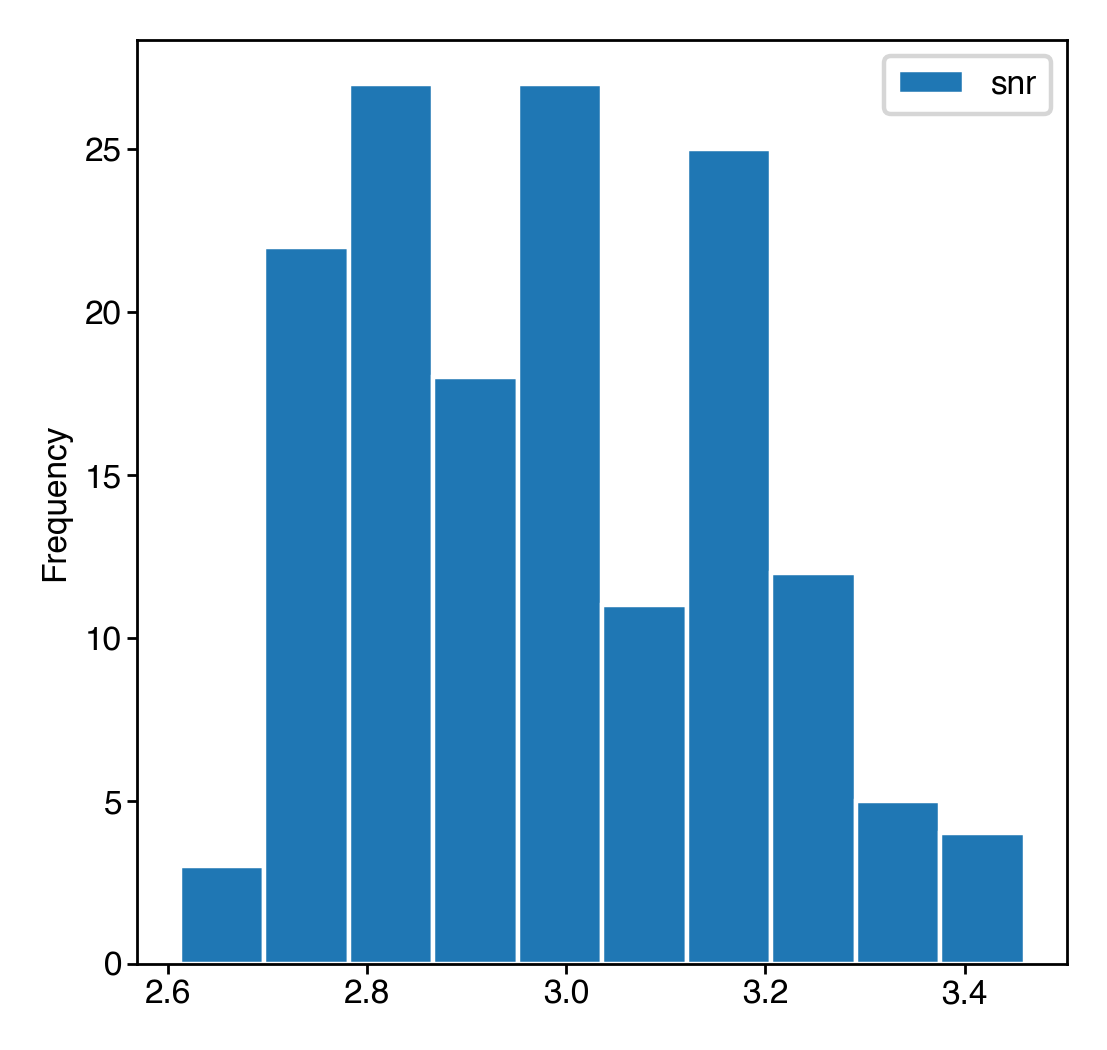

In [64]:
stats[['snr']].plot(kind='hist')

<Axes: ylabel='Frequency'>

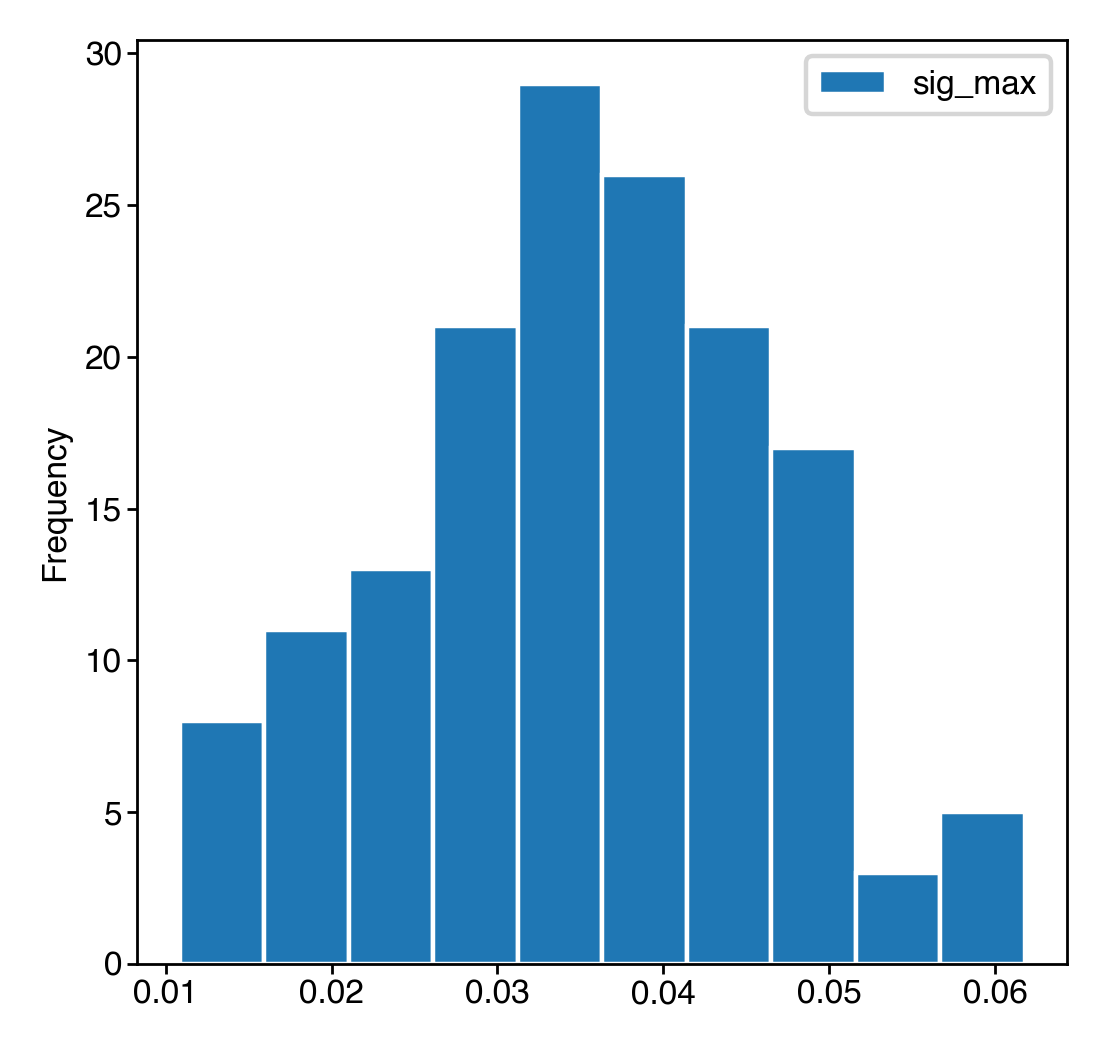

In [58]:
stats[['sig_max']].plot(kind='hist')

<Axes: ylabel='Frequency'>

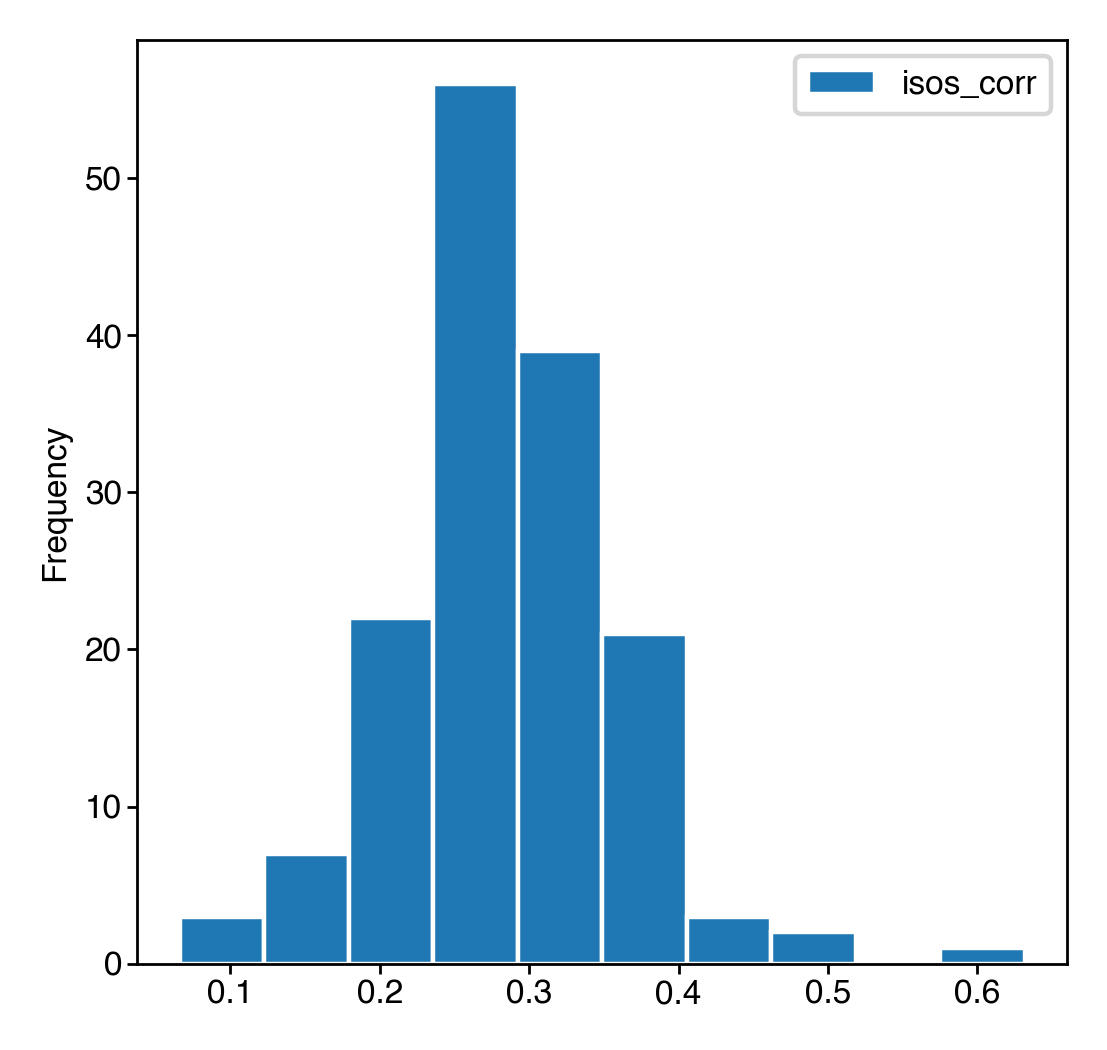

In [63]:
stats[['isos_corr']].plot(kind='hist')

In [65]:
df = pd.read_parquet(files[0])

<Axes: xlabel='timestamp'>

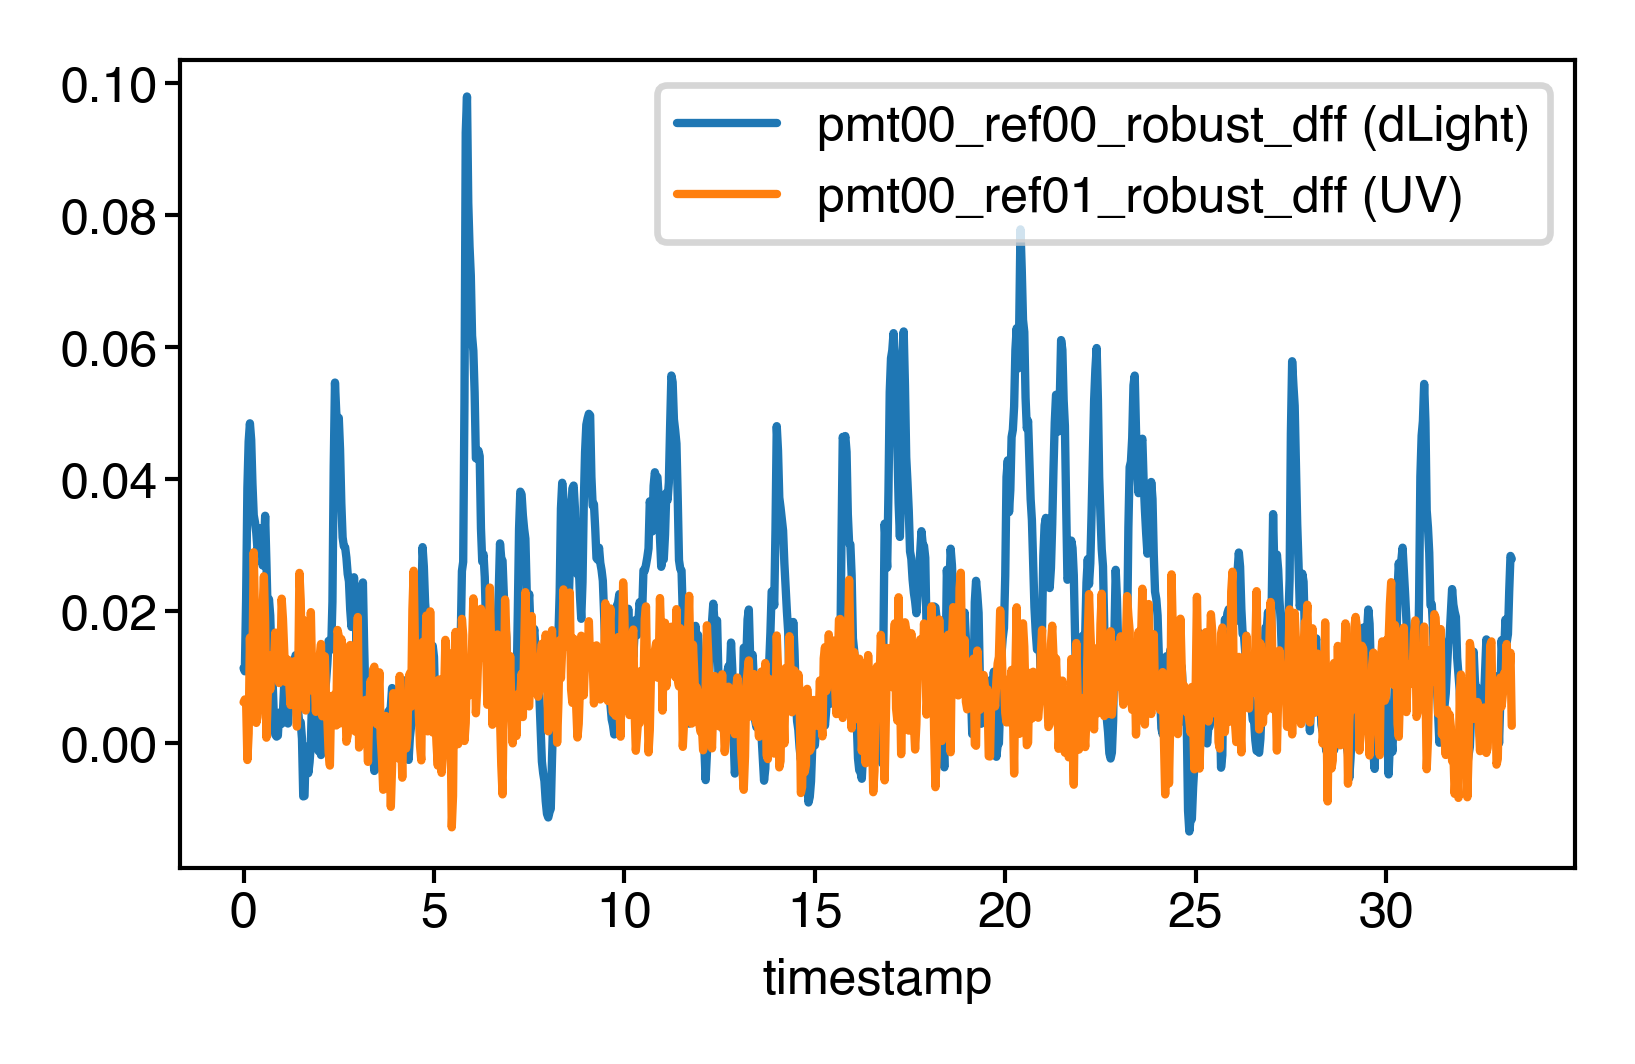

In [39]:
fig = figure(3, 1.75)
ax = fig.gca()
df.iloc[:1_000].set_index("timestamp")[
    ["pmt00_ref00_robust_dff (dLight)", "pmt00_ref01_robust_dff (UV)"]
].plot(ax=ax)

<Axes: xlabel='timestamp'>

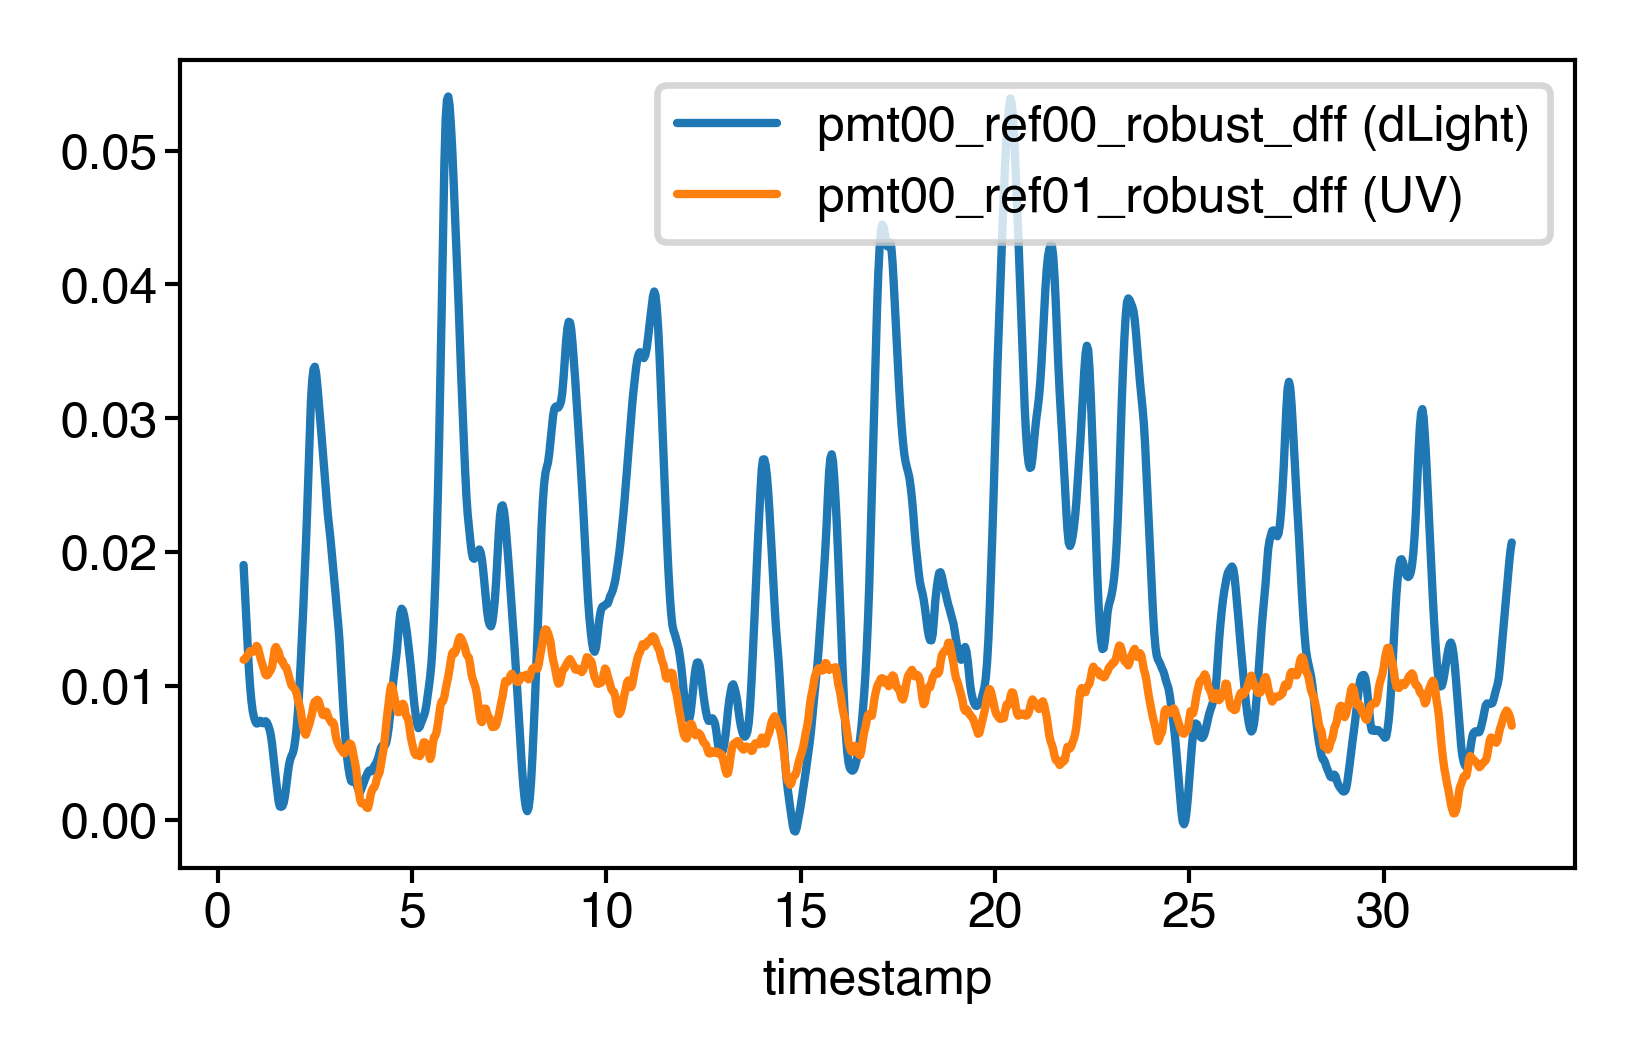

In [66]:
fig = figure(3, 1.75)
ax = fig.gca()
d = (
    df.set_index("timestamp")[
        ["pmt00_ref01_robust_dff (UV)", "pmt00_ref00_robust_dff (dLight)"][::-1]
    ]
    .rolling(41, win_type="exponential", center=True)
    .mean(tau=5)
)
d.iloc[:1_000].plot(ax=ax)

In [56]:
d.corr()

,pmt00_ref00_robust_dff (dLight),pmt00_ref01_robust_dff (UV)
pmt00_ref00_robust_dff (dLight),1.000000,0.250867
pmt00_ref01_robust_dff (UV),0.250867,1.000000


<Figure size 600x600 with 0 Axes>

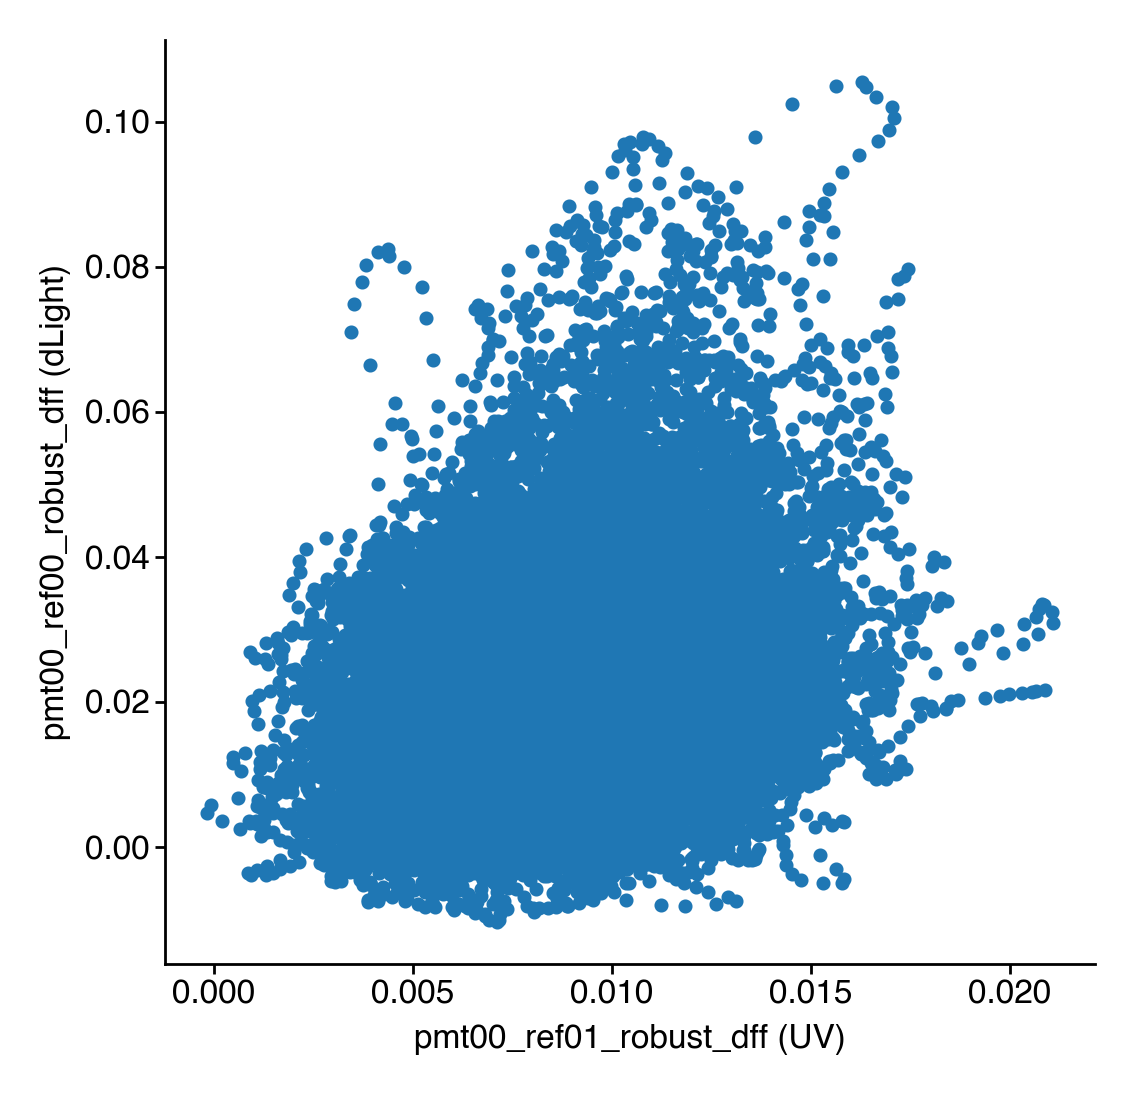

In [67]:
fig = figure(2, 2)
d.plot(
    kind="scatter",
    x="pmt00_ref01_robust_dff (UV)",
    y="pmt00_ref00_robust_dff (dLight)",
    s=3,
)
sns.despine()